In [95]:
from matplotlib import pyplot as plt
%matplotlib inline
from matplotlib import style
style.use('seaborn-talk')
from matplotlib import cm
import numpy as np
import os
import scipy.io
import seaborn as sb
from scipy.fftpack import fft
import csv
import pandas as pd
from scipy.signal import butter, filtfilt
import glob
import seaborn as sns
import scikit_posthocs as sp
from scipy import signal

In [96]:
# Pathways
outpath = r'C:\Users\Daniellab\Desktop\Jorge_Analysis\Tortuosity'
figpath = r'C:\Users\Daniellab\Desktop\Jorge_Analysis\Tortuosity\Figure'
source = r'C:\Users\Daniellab\Desktop\Jorge_Analysis\Centroids_Final\Raw_NG'

In [97]:
#load single flight path
df = pd.read_csv(source + '\Centroids_Final_Sham_2_46690.csv')
df_sham = pd.read_csv(source + '\Centroids_Final_Sham_18_60894.csv')

In [98]:
def removeNaN(df): 
    if np.any(df.X_position.isnull()):
        a = np.asarray(np.where(df.X_position.isnull())).ravel()
        b = a[1:]
        c = a[:-1]
        d = b-c
        last_chunk = len(df.X_position) - a[-1]


        if last_chunk > 100:

            start = a[-1]+1
            end = a[-1] + last_chunk-1

        elif a[0] > 100:
            start = 0
            end = a[0]-1


        elif d.max() > 100:
            e = d.argmax()
            start = a[e]+1
            end = a[e+1]-1

        else:
            print('error')
    
        x_no_nan = df.X_position.values[start:end]
        y_no_nan = df.Y_position.values[start:end]
        return(x_no_nan, y_no_nan)
    else:
        x = df.X_position.values
        y = df.Y_position.values
        return(x,y)

In [99]:
def tortuosity_ratio(x,y,chunk):
    
    n = np.arange(0,len(x),chunk)
    ratio_list = []
    
    for element in n[1:]:

        shortest_path = np.sqrt((x[element]-x[element-chunk])**2 + (y[element]-y[element-chunk])**2)

        i = 1
        actual_list = 0
        for e in x[element-chunk:element-1]:

            actual_path = np.sqrt((x[element-chunk:element][i]-x[element-chunk:element][i-1])**2 + (y[element-chunk:element][i]-y[element-chunk:element][i-1])**2)
            actual_list += actual_path

            i +=1
            
        ratio = actual_list/shortest_path
        ratio_list.append(ratio)
        
        mean = np.mean(ratio_list)
        std = np.std(ratio_list)
    return(mean, std)

In [116]:
actual_list

57.99212592907771

In [119]:
n = np.arange(0, len(x_e), 25)
x = x_e
y = y_e
chunk = 25
ratio_list = []
for element in n[1:]:
    shortest_path = np.sqrt((x[element]-x[element-chunk])**2 + (y[element]-y[element-chunk])**2)
    print(shortest_path)
    i = 1
    actual_list = 0
    for e in x[element-chunk:element-1]:

        actual_path = np.sqrt((x[element-chunk:element][i]-x[element-chunk:element][i-1])**2 + (y[element-chunk:element][i]-y[element-chunk:element][i-1])**2)
        actual_list += actual_path
        
        i +=1

#     ratio = actual_list/shortest_path
#     ratio_list.append(ratio)

#     mean = np.mean(ratio_list)
#     std = np.std(ratio_list)

123.77980189470082
77.64030080190967
182.32762402878032
75.30750127615816
15.0
0.0
56.85236705815999
217.87227516821406
210.5957958395209
142.20973615985085
40.06143483686262


In [106]:
x_e

287

In [100]:
x_e, y_e = removeNaN(df)
x_s, y_s = removeNaN(df_sham)

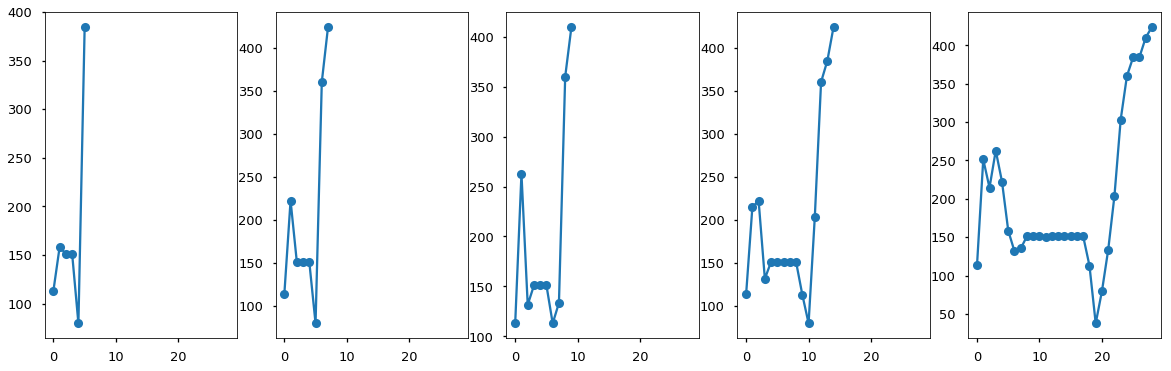

In [101]:
z = 50
fig, ax = plt.subplots(1,5, figsize = (20,6), sharex = True)
ax[0].plot(y_e[::z], "-o")
ax[1].plot(y_e[::40], "-o")
ax[2].plot(y_e[::30], "-o")
ax[3].plot(y_e[::20], "-o")
ax[4].plot(y_e[::10], "-o")

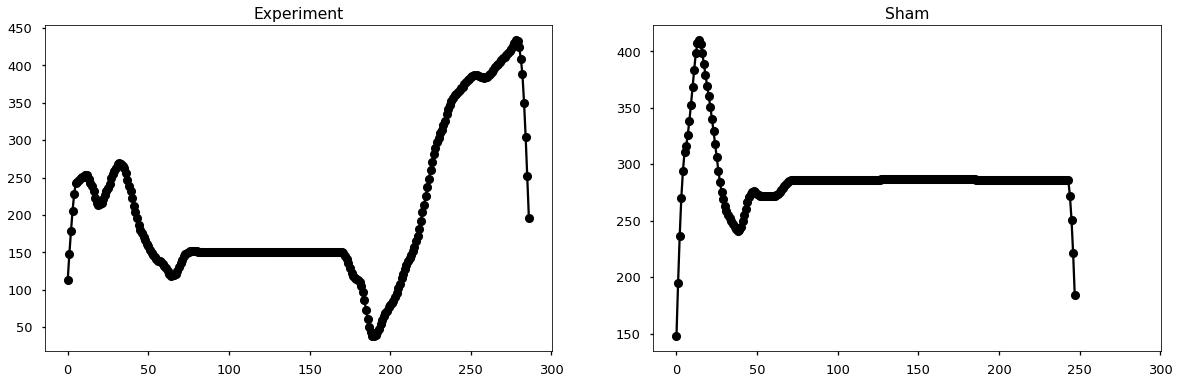

In [122]:
fig, ax = plt.subplots(1,2, figsize = (20,6), sharex = True)
ax[0].set_title("Experiment")
ax[0].plot(y_e, "o-", c = "k")
ax[1].set_title("Sham")
ax[1].plot(y_s, "o-", c = "k")

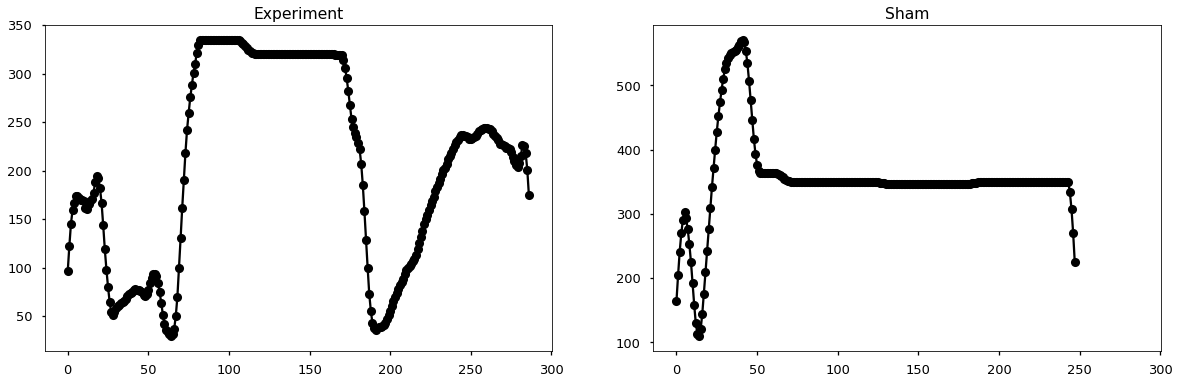

In [123]:
fig, ax = plt.subplots(1,2, figsize = (20,6), sharex = True)
ax[0].set_title("Experiment")
ax[0].plot(x_e, "o-", c = "k")
ax[1].set_title("Sham")
ax[1].plot(x_s, "o-", c = "k")

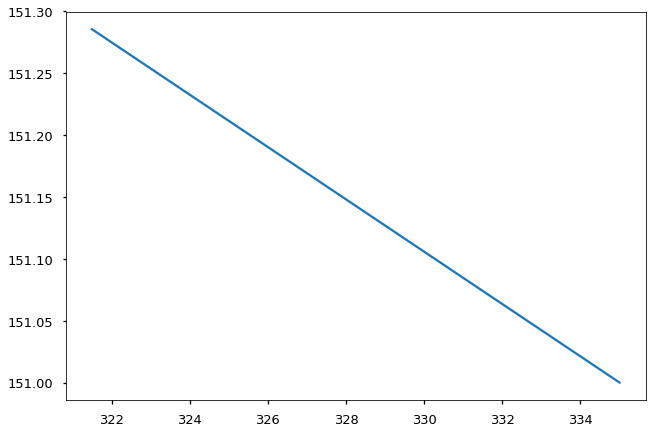

In [121]:
plt.plot(x_e[80:100],y_e[80:100])

In [104]:
mean_e, std_e = tortuosity_ratio(x_e,y_e, 25)
mean_s, std_s = tortuosity_ratio(x_s,y_s, 25)
mean_e, mean_s

C:\Users\Daniellab\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in double_scalars


(nan, nan)

In [8]:
#iterate through and see how many frames each visit is (choose a chunk appropriately)
#need to normalize for animals that have more 50 frame chunks, can't simply add the ratios (mean ratio is pretty easy way of doing that, could also limit number of bins to limit number of additions, what deviation is tom talking about? deviaton of ratios within each moth compared across both light levels? also put in integral somehow?)

In [10]:
t = df.loc[0:len(x_e),'FrameNumber']/100
Time = t[len(t)-1]-t[0]
Time

1.3700000000000045

In [11]:
def mean(numbers):
    return float(sum(numbers)) / max(len(numbers), 1)

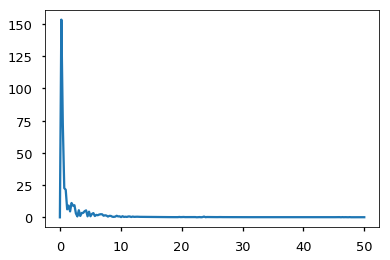

In [12]:
xf = np.linspace(0.0, 1.0/(2.0*1/((100))), len(x_s)//2)
plt.plot(xf, 2.0/len(x_s) * np.abs(fft(x_s-mean(x_s))[0:len(x_s)//2]))

In [13]:
xf = np.linspace(0.0, 1.0/(2.0*1/((100))), len(x_s)//2)
plt.plot(xf, 2.0/len(x_s_filtered) * np.abs(fft(x_s_filtered-mean(x_s_filtered))[0:len(x_s_filtered)//2]))

NameError: name 'x_s_filtered' is not defined